## **1. Import the required libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.ensemble import IsolationForest

from scipy.stats import trim_mean

import warnings
warnings.filterwarnings('ignore')

## **2. Read The Dataset**

In [ ]:
df = pd.read_excel("/content/P3- Churn-Modelling Data.xlsx")
churn_modeling = df.copy()
churn_modeling

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## **3. Display Setting**
- We are using display setting because in case if we do feature engineering so some columns not able to see thats why we use display settings.

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
sklearn.set_config(transform_output='pandas')

In [ ]:
# lets see the first 5 records

(
    churn_modeling
    .head()
)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### **columns:**

>- **SurName :** This columns stores the sirname of each customers.
>- **CreditScore:** This is a numerical value representing the credit score of each customer.
>- **Geography:** Indicates the geographical location or region associated with each customer.
>- Gender adn Age of customers
>- **Tenure :** This is the time of customer associated with the comapny.
>- Balanced of customer , Customer has credit card or not , Is it active member of company or not, Salary for that specifc customer.
>- **Churned :** It is showing that the customer leaves the service or not. 1 means Yes and 0 means No.

## **4. Preliminary Analysis**

### **4.1 Checking info**

In [ ]:
churn_modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  churned          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### **4.2 Checking duplicates**

In [ ]:
churn_modeling.duplicated().sum()

0

### **4.3 Checking Null values**

In [ ]:
churn_modeling.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churned            0
dtype: int64

In [ ]:
# column row number and Surname doesnt required for the analysis purpose beacuse we have index so we can delete them.

churn_modeling = churn_modeling.drop(columns='RowNumber')

In [ ]:
churn_modeling = churn_modeling.drop(columns='Surname')

### **4.4 checking total records**

In [ ]:
(
    churn_modeling
    .shape
)

(10000, 12)

### **4.5 Checking Data Proportionality**

In [ ]:
(
    churn_modeling
    .churned
    .value_counts(normalize=True)*100
)

churned
0    79.63
1    20.37
Name: proportion, dtype: float64

### **4.6 Columns we have**

In [ ]:
(
    churn_modeling
    .columns
)

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'churned'],
      dtype='object')

## **Observations :**
>- As we seen above there are no any duplicate and also null values are availabel.
>- The dtypes according to columns are also correct.
>- Data is biased towords the Not churned so when we build the model so wehave to use over or undersampling techniques to make them in prportion.

## **5. High Level Summary of Data**

In [ ]:
(
    churn_modeling
    .describe()
)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


>- We can see that Average age of customer , itis Tenure with services.
>- Also we got the info of minimum age , Tenure, balanced and its salary.

In [ ]:
(
    churn_modeling
    .describe(include='object')
    .T
)

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


>- Here we can see that most surnames occurs in data.
>- From which region we have more number of customers.

In [ ]:
(
    churn_modeling
    .assign(
        NumOfProducts = churn_modeling.NumOfProducts.astype(object),
        HasCrCard = churn_modeling.HasCrCard.astype(object),
        IsActiveMember = churn_modeling.IsActiveMember.astype(object),
        churned = churn_modeling.churned.astype(object)
    )
    .describe(include='object')
)

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,churned
count,10000,10000,10000,10000,10000,10000
unique,3,2,4,2,2,2
top,France,Male,1,1,1,0
freq,5014,5457,5084,7055,5151,7963


>- We got the additional info that most of the customers has product total 5084 and rest of them has no any.
>- 7055 customer has credit card and rest of customer has doesn't.
>- Total active members are 5151 and rest of them are not.

## **6. High Level Analysis of Outlier**

### **We are using IsolationForest**
>- It is an ensembel learning algorithm used to detect an outlier.
>- First it selects an random feature and then it select random value between min and max.
>- After selecting that it perform split on it and immediatly finds an outlier beacuse they are different from majority of data.
>- After that this will perform by each subtrees and take an average of them.
>- finally for an outlier assigns value -1 and if not then only 1.

In [ ]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [ ]:
(
    churn_modeling
    .assign(
        outlier = forest.fit_predict(
            churn_modeling
            .drop(columns='churned')
            .select_dtypes(include='number')
        )
    )
    .query('outlier == -1')
)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned,outlier
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,-1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0,-1
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,-1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,-1
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,15657105,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0,-1
9993,15569266,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,-1
9994,15719294,800,France,Female,29,2,0.00,2,0,0,167773.55,0,-1
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,-1


>- We can see that total outliers we have.
>- So as we know that these outliers occured in CreditScore, Tenure, Balance, EstimatedSalary and Age.
>- As we know that each cutsomer doesn't have same amount or experince or credit score and balance.
>- This maybe useful info for us and we dont cap them.
>- Now if not then we can use ensemble leanring algorithms that helps to handle outlier internally.

## **7. Pairplot and Correlation Plot**

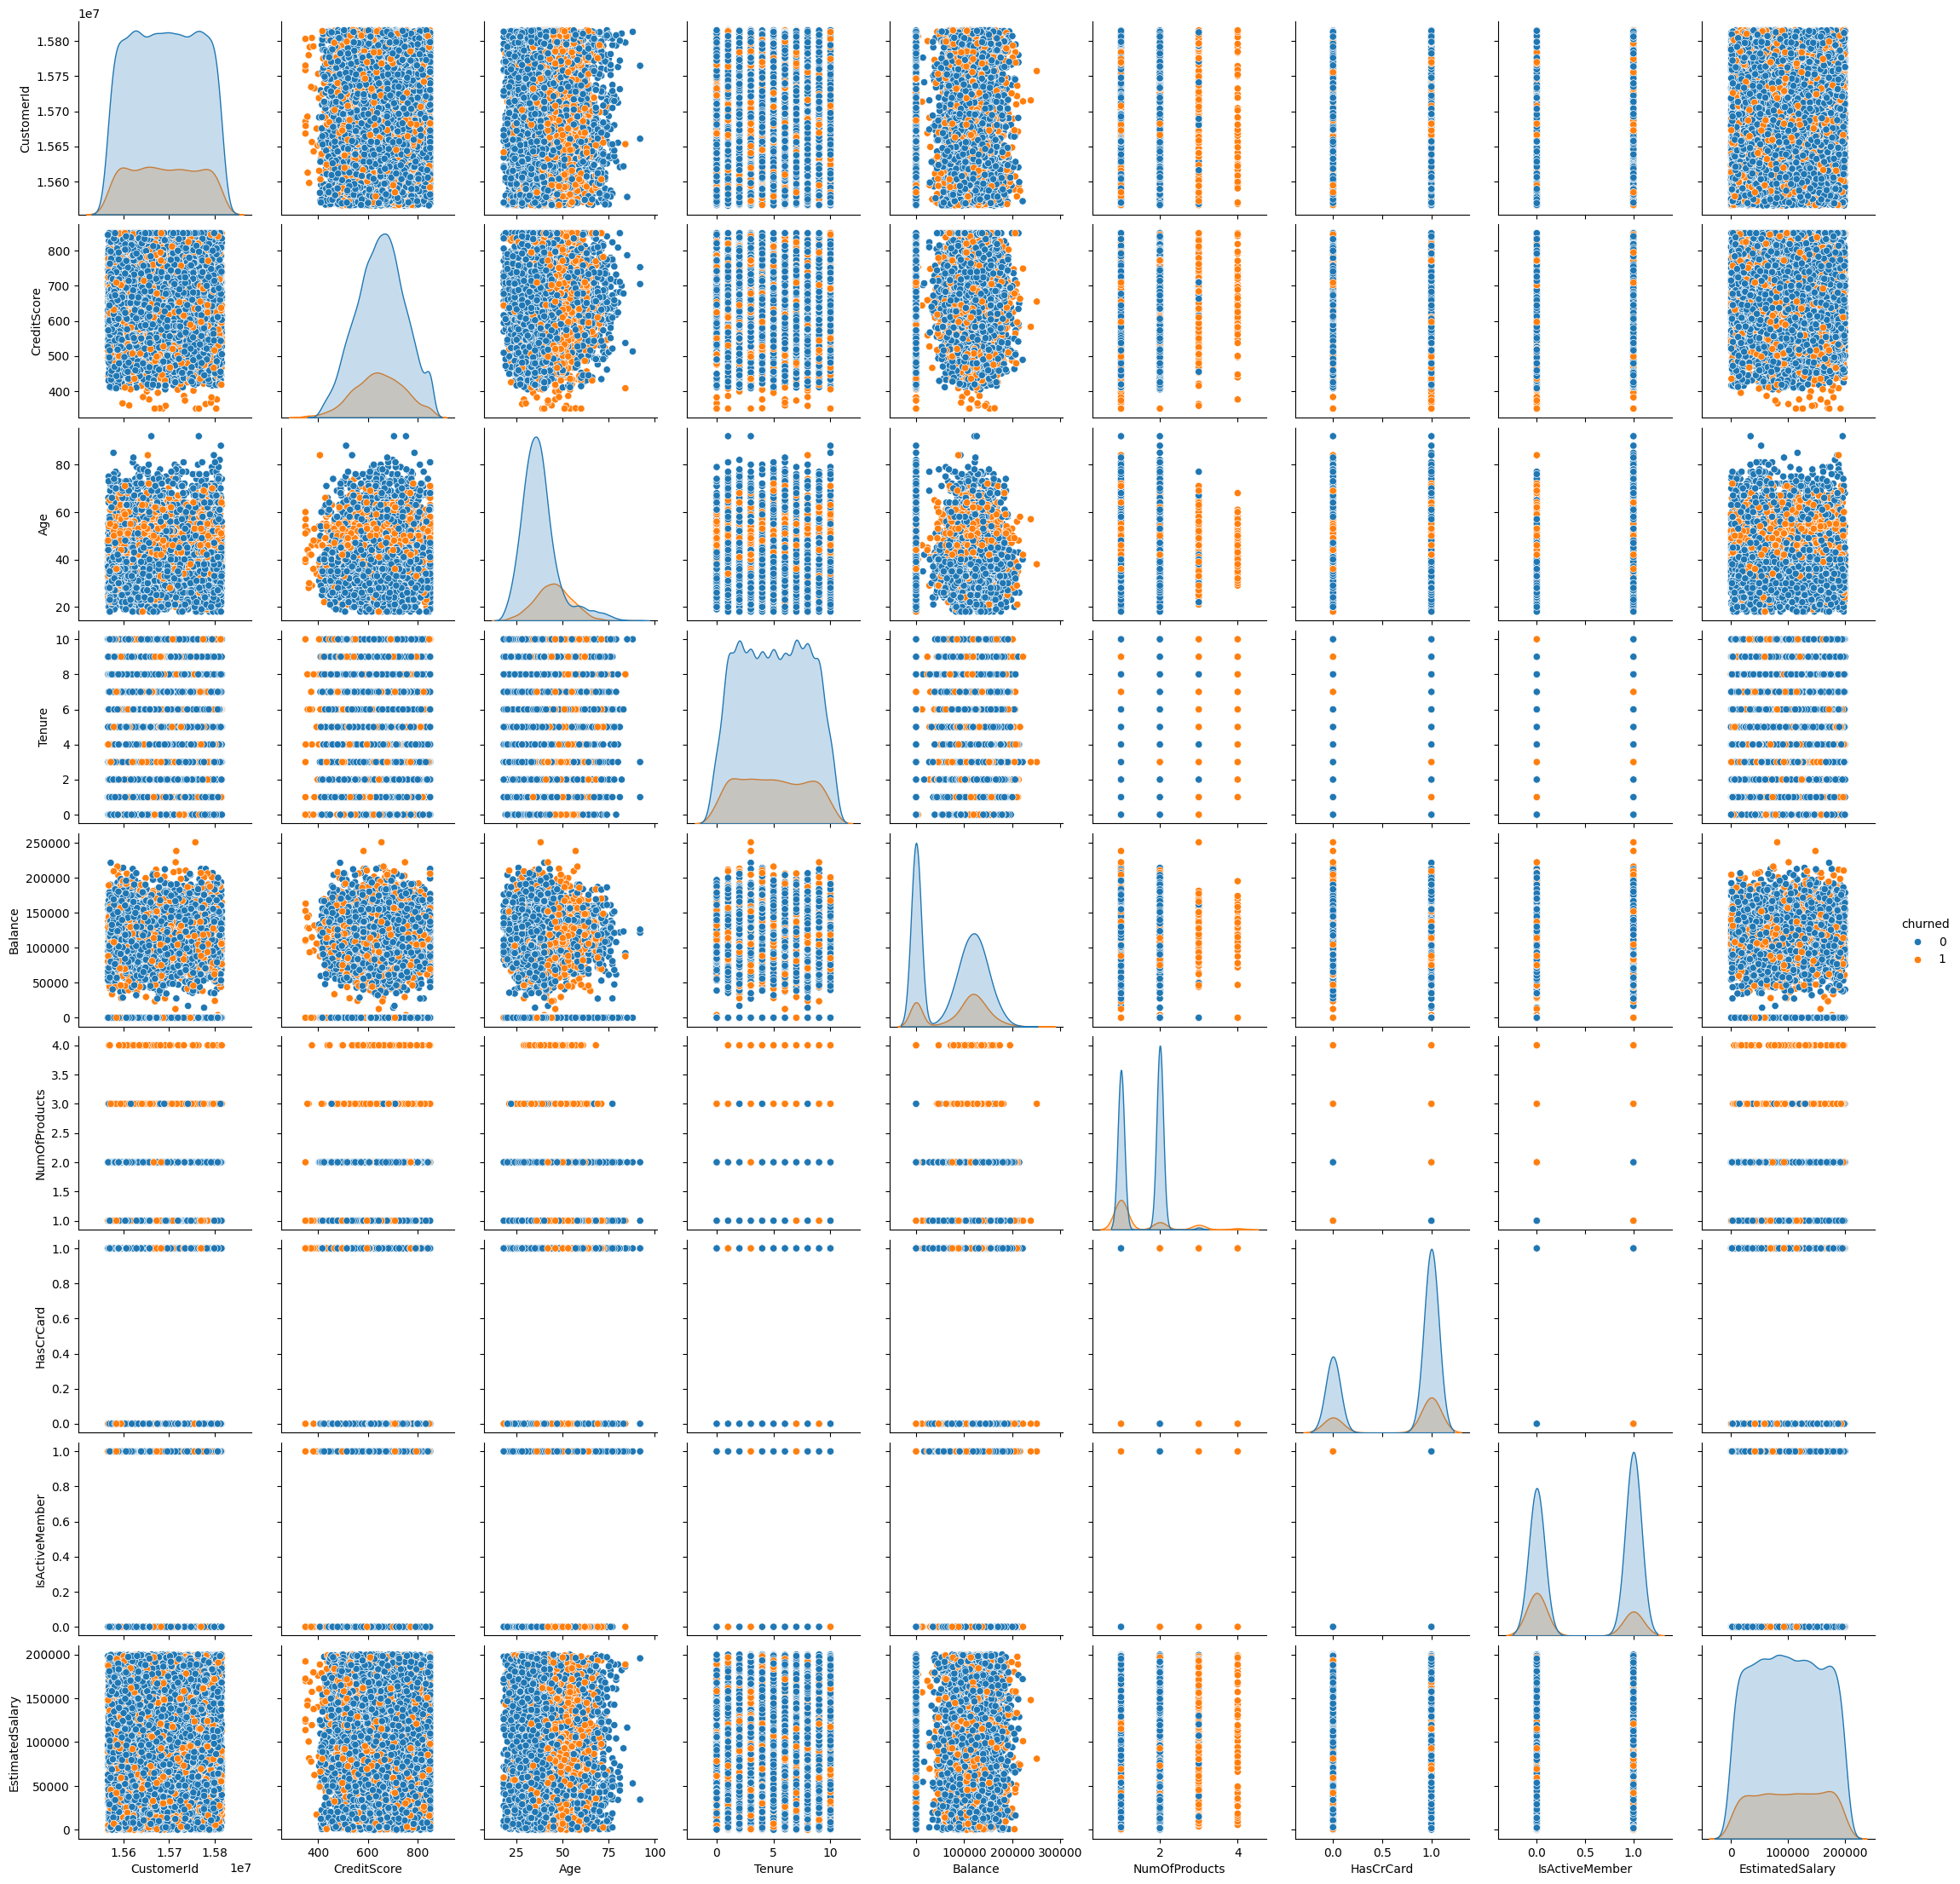

In [ ]:
sns.pairplot(data=churn_modeling, hue='churned')

<Axes: >

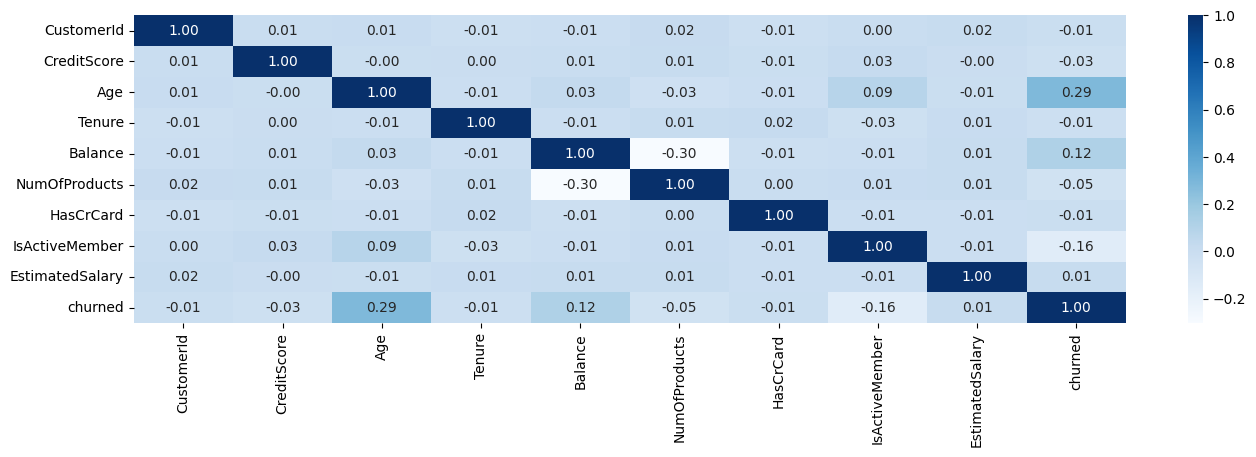

In [ ]:
plt.figure(figsize=(16,4))
sns.heatmap(data=churn_modeling.select_dtypes(include='number').corr(), annot=True, cmap='Blues', fmt='.2f')

>- We can see that we dont have any multicollineairty issue.

## **8. Detailed Analysis**

### **8.1 Customer Demographics**

####  **8.1.1 what is distribution of customers across different ages**

In [ ]:
# what is distribution of customers across different ages

(
    churn_modeling
    .Age
    .reset_index()
    .join(
        churn_modeling
        .churned
    )
)

,index,Age,churned
0,0,42,1
1,1,41,0
2,2,42,1
3,3,39,0
4,4,43,0
...,...,...,...
9995,9995,39,0
9996,9996,35,0
9997,9997,36,1
9998,9998,42,1


Text(0.5, 1.0, 'Distribution of Age')

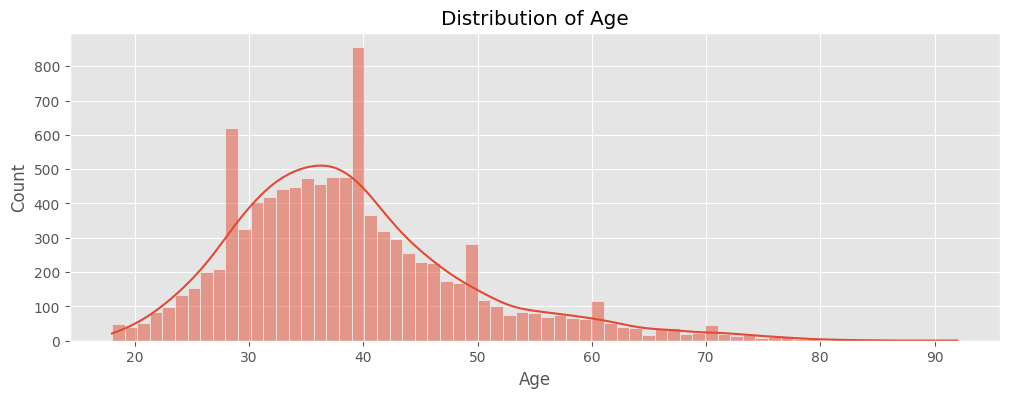

In [ ]:
# lets see the distribution

credit = (
    churn_modeling
    .Age
    .reset_index()
)

plt.style.use('ggplot')
plt.figure(figsize=(12,4))
sns.histplot(credit['Age'],kde=True, legend=True)
plt.title('Distribution of Age')

>- The distribution of customers across different age groups is skewed towards the left. This skewness indicates that the majority of customers are in the younger age groups, particularly between 20 and 50 years old. There are fewer customers in the higher age ranges of 60-70, 80-90


### **Recommendation**

>- Develope most of products or services that helps for younger ages between 20 - 50.
>- Consider some incentives to the Customer.

Text(0.5, 1.0, 'Distribution of Age across churn rate')

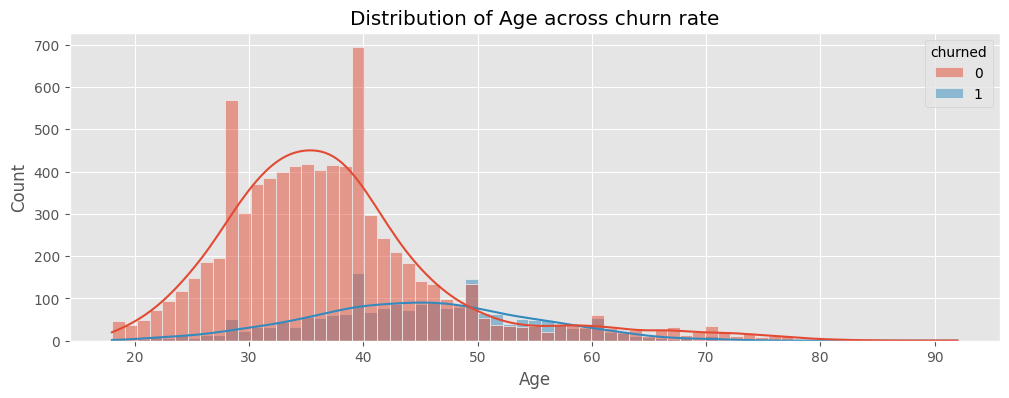

In [ ]:
# distribution of Age across churn rate

age_churned = (
    churn_modeling
    .Age
    .reset_index()
    .join(
        churn_modeling
        .churned
    )
)

plt.figure(figsize=(12,4))
sns.histplot(data = age_churned, x = 'Age',kde=True, legend=True,hue= 'churned')
plt.title('Distribution of Age across churn rate')

>- We can see that the above 130 customers with ages 39 - 50 are churned.

In [ ]:
age_stats = (
    churn_modeling
    .Age
    .agg(
        [
            'min',
            'median',
            'max',
            'min',
        ]
    )
    .reset_index()
)

trimmed_mean_10 = trim_mean(churn_modeling.Age, 0.1)
trimmed_mean_5 = trim_mean(churn_modeling.Age, 0.05)

age_stats.loc[3] = ['trimmed_mean (10%)', trimmed_mean_10]
age_stats.loc[4] = ['trimmed_mean (5%)', trimmed_mean_5]

age_stats

,index,Age
0,min,18.000000
1,median,37.000000
2,max,92.000000
3,trimmed_mean (10%),37.914750
4,trimmed_mean (5%),38.282556


>- From above info we can able to know abuot actual mean value of Age.
>- Because it gives the trimmed mean value means it is taking mean value after removing 5% above and 5% below of distriution and then takes mean value.

#### **8.1.2 Analyze the gender distribution of customers.**

In [ ]:
(
    churn_modeling
    .Gender
    .value_counts()
)

Gender
Male      5457
Female    4543
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender Distribution in Customer Data')

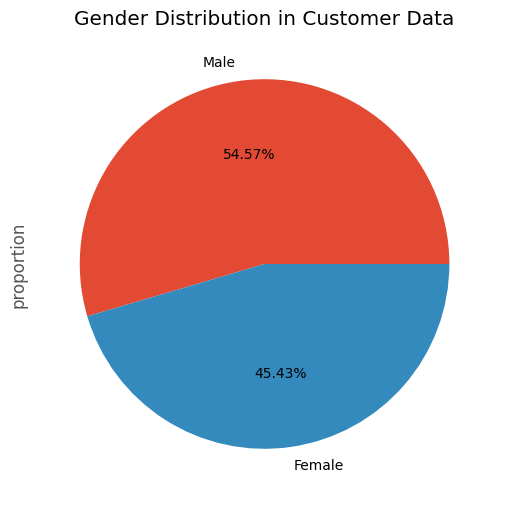

In [ ]:
(
    churn_modeling
    .Gender
    .value_counts(normalize=True)
    .mul(100)
    .plot(kind='pie', autopct='%.2f%%', figsize=(6, 6), labels=churn_modeling.Gender.value_counts().index)
)

plt.title("Gender Distribution in Customer Data")

>- Above plot shows the Gender Distribution.
>- We can see that male customer has more distribution of 10% as compare to female.

Text(0.5, 1.0, 'Gender Distribution over Churned')

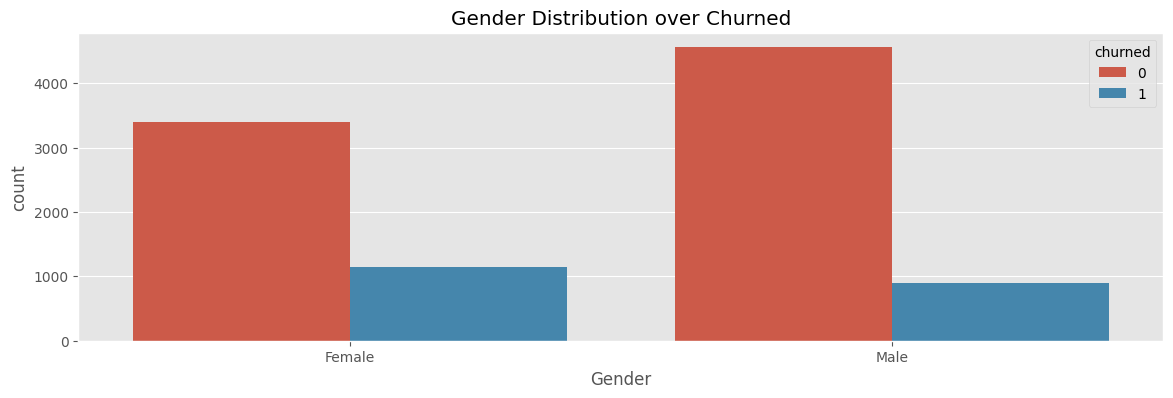

In [ ]:
# lets see the Gender distribution over churn rate.

gender_churned = (
    churn_modeling
    .groupby('Gender')
    .churned
    .value_counts()
    .reset_index()
)

plt.figure(figsize=(14,4))
sns.barplot(data=gender_churned, x='Gender', y='count', hue='churned')
plt.title('Gender Distribution over Churned')

>- We can see that More distriution is of male in distribution as customers but also more distribution in churn rate also and less of women as comapre to the men.

### **8.2 Churn Analysis**

#### **8.2.1 What percentage of customers have churned?**

In [ ]:
(
    churn_modeling
    .churned
    .value_counts(normalize=True)
    .mul(100)
)

churned
0    79.63
1    20.37
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Distribution of Churned in Data')

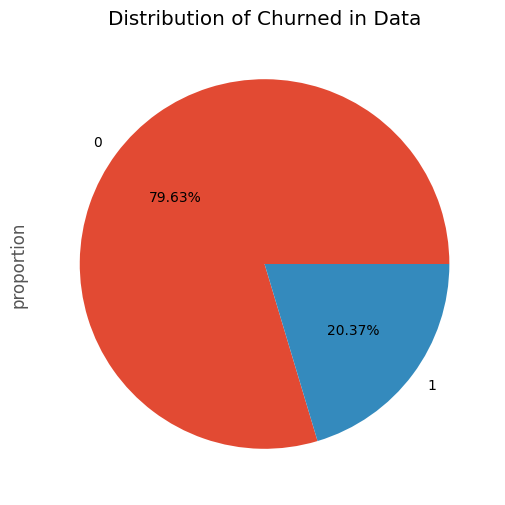

In [ ]:
(
    churn_modeling
    .churned
    .value_counts(normalize=True)
    .mul(100)
    .plot(kind='pie', autopct='%.2f%%', figsize=(6, 6), labels=churn_modeling.churned.value_counts().index)
)

plt.title("Distribution of Churned in Data")

>- Clearly notable that 80 % of the data is biased towards the not chruned category.
>- To handle it further we have to use smote.
>- **Percentage of customers who have churned: 20.37%**

#### **8.2.2 What are the main reasons for customer churn?**

In [ ]:
churn_modeling.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'churned'],
      dtype='object')

Main reason for customer churn:




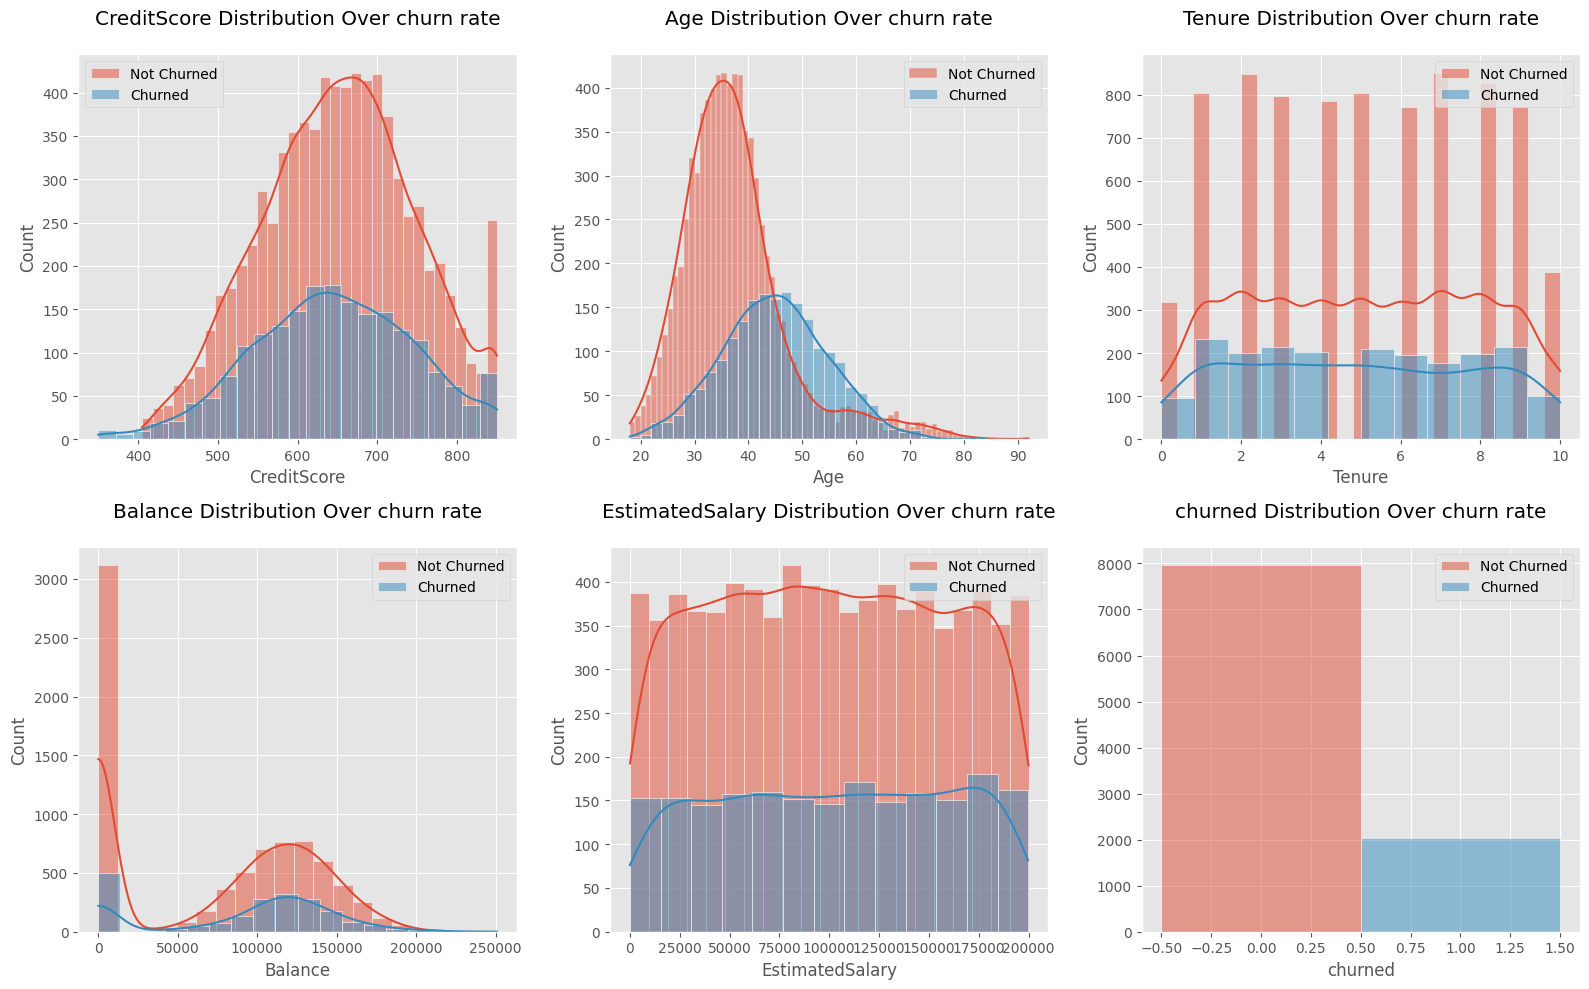

In [ ]:
print('Main reason for customer churn:\n\n')

plt.figure(figsize=(16,10))
i = 1

for col in churn_modeling.select_dtypes(include='number').drop(columns=['CustomerId','NumOfProducts', 'HasCrCard', 'IsActiveMember']).columns:
    plt.subplot(2, 3, i)
    sns.histplot(churn_modeling[churn_modeling.churned == 0][col], kde=True, label='Not Churned')
    sns.histplot(churn_modeling[churn_modeling.churned == 1][col], kde=True, label='Churned')
    plt.legend()
    plt.title(f'{col} Distribution Over churn rate\n')
    i += 1

plt.tight_layout()

### **These are the main reasons for customer churn**
>- **CreditScore:** - First the distribution of CreditScore is positively skewed.
>- 150-200 customers get churned who has CreditScore 620-650.
>- Also 400+ customers not get churned who has CreditScore in between 600-700.

>- **Age:**- The age distribution is skewed to the left.
>- A significant number of customers (150+) aged between 40-55 have churned.
>- A substantial number of customers (400+) aged between 20-45 have not churned.  

>- **Tenure:**- There is consistency in the years of tenure for both churned and non-churned customers.
>- From 0-10 years of tenure, 100-200+ customers have churned.
>- From 0-10 years of tenure, 300-800+ customers have not churned.

>- **Balance:**- customer with 0 balance get churned approx 500 and not churned over 3000+.
>- A significant number of customers (250+) has balance between 100000-150000 have churned.
>- A substantial number of customers (600+) has balance between 100000-150000 have not churned.  

>- **EstimatedSalary:**- The distribution shows consistency in the salary range for both churned and non-churned customers.
>- Between 140-180 customer gets churned between 0-200000 EstimatedSalary.
>- Between 340-450 customer not gets churned between 0-200000 EstimatedSalary.

### **Forecast to Minimize churn rate**
##### **CreditScore**
>- We can implement the programs to improve CreditScore of customers, especially those in between range 620-650.
>- Introduce loyalty programs for maintaining or improving there credit scores.Offer incentives , discount and cashbacks or service to encourage financial potential behaviour.
>- We have to recah out the customer to understand there concerns nd offer solution to prevet churn.

##### **Age**
>- We can implement programs and services by targeting the older customer in 40-55 age group.
>- We have to uderstood problems of older customers like what if older customer may value financial security, while younger customer may proiratize innovative and flexile services.

##### **Tenure**
>- we have to develope the early engagement programs. This ensuring the positive experience may lead to the long tenure.

##### **Balance**
>- Implement the engagement programs to understand needs of zero balance customers. Providing them financial product or incentive may help to reduce churn rate.

#### **8.2.3 Identify any patterns or trends among customers who have churned.**

Identified patterns or trends among customers who have churned:




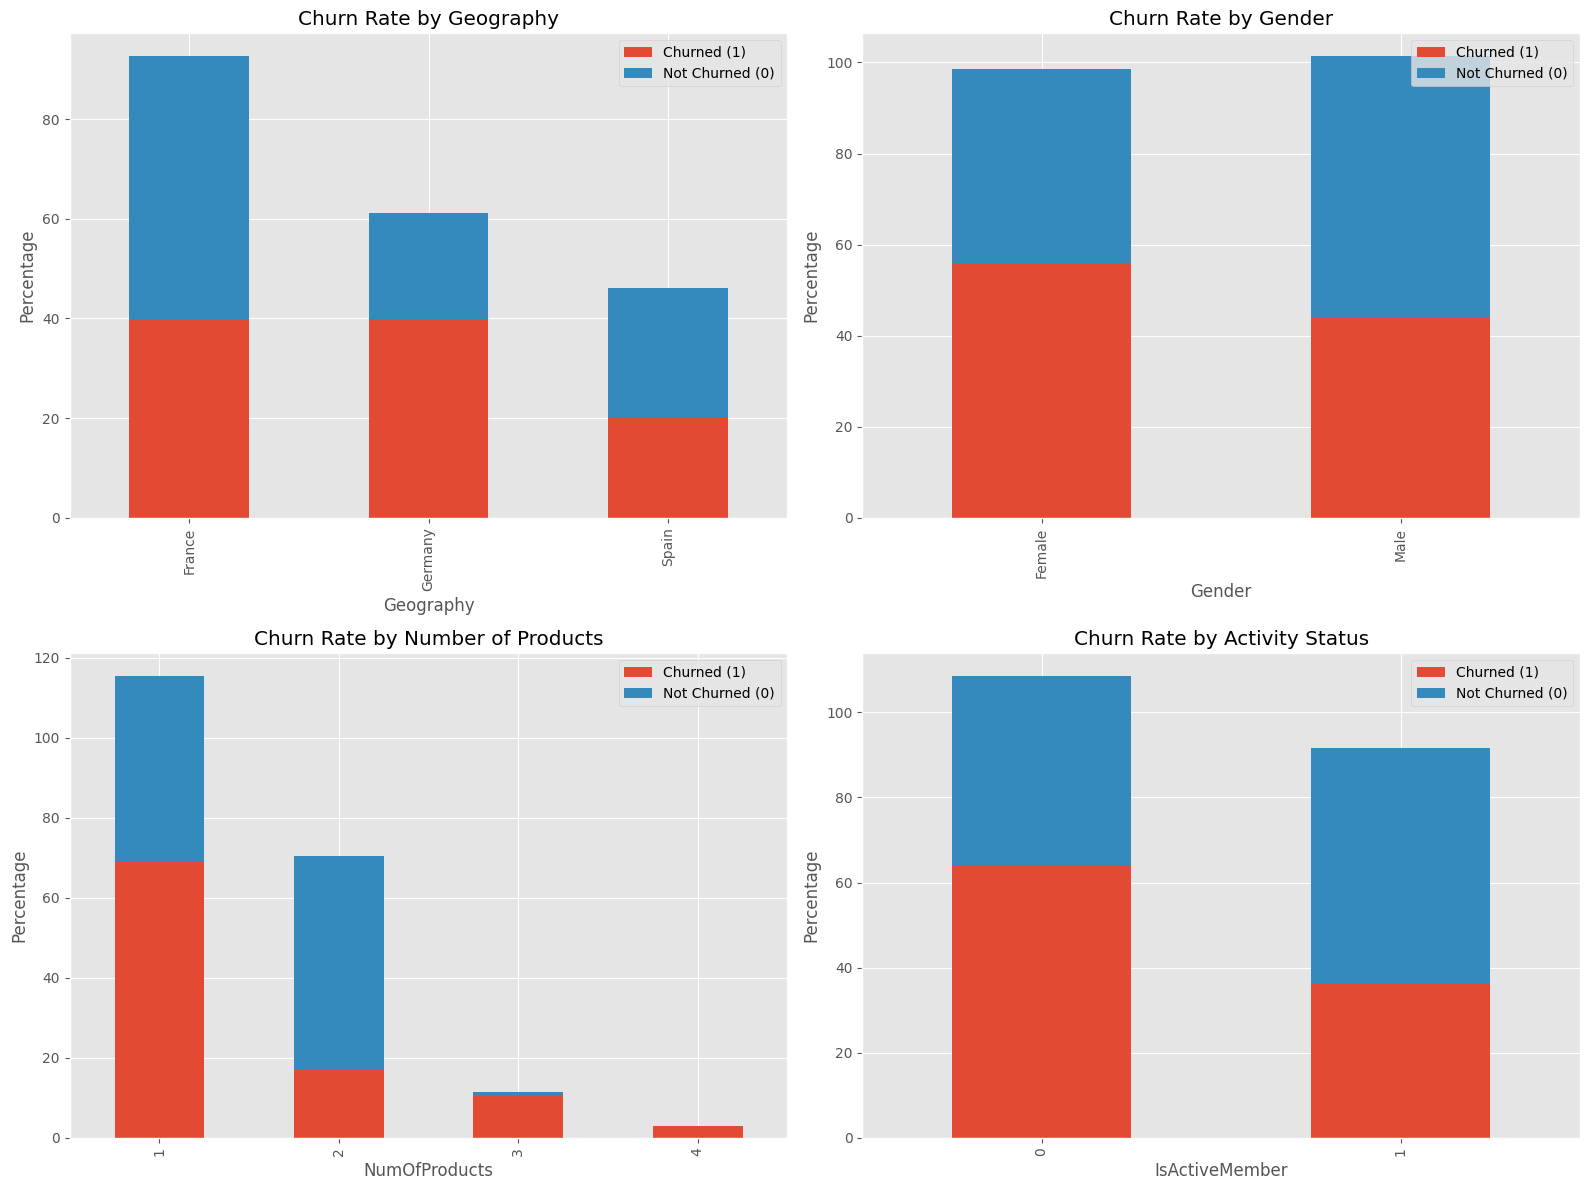

In [ ]:
print('Identified patterns or trends among customers who have churned:\n\n')

columns = ['Geography', 'Gender', 'NumOfProducts', 'IsActiveMember']
titles = ['Churn Rate by Geography', 'Churn Rate by Gender', 'Churn Rate by Number of Products', 'Churn Rate by Activity Status']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

for ax, col, title in zip(axes.flatten(), columns, titles):

    churned_counts = churn_modeling[churn_modeling.churned == 1][col].value_counts(normalize=True) * 100
    not_churned_counts = churn_modeling[churn_modeling.churned == 0][col].value_counts(normalize=True) * 100

    churn_data = pd.DataFrame({'Churned (1)': churned_counts, 'Not Churned (0)': not_churned_counts})

    churn_data.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(title)
    ax.set_ylabel('Percentage')
    ax.set_xlabel(col)
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

### **Insights**

>- **Geography:**- France and germany has same churned rate over 40% customers.
>- **Gener:**- overall female has more 10% percent of churn rate as compare to male.
>- **NumOfProduct:**- We cn see that customer who has 1st product they are churned above 60% and not churned over 110%.
>- Customer with 2nd product has less chrun rate above 10% only as compare to those customers with same product range whih are not churned above 60%.
>- Customer with 3rd products are more likely to churned and not churned just 1% more were customer not gets churned from overall 10%.
>- means customer with 3 products gets churned 10% and not churned by 9%.
>- **IsActiveMember:**- Customer those are not active they have more churn rate as comapre to customer those are actually active.

### **Forecast**
>- **Geography:** Implement targeted retention strategies in regions like France and Germany where churn rates are consistently high (over 40%). This could involve personalized customer outreach, loyalty programs, or service enhancements tailored to regional preferences.

>- **Gender:** Address the higher churn rate among female customers (10% higher compared to males) by exploring potential gender-specific service improvements or marketing strategies. Understanding and addressing gender-specific needs and preferences can help in reducing churn.

>- **NumOfProduts:** Focus on enhancing the value proposition for customers with fewer products (1 or 2) to reduce their higher churn rates (over 60% for 1 product and over 10% for 2 products). This might involve bundling products, offering incentives for multi-product usage.

>- **IsActiveMember:** Increase efforts to engage and retain customers who are not active members, as they show higher churn rates compared to active members.

### **8.3 Product Usage**

#### **8.3.1 What are the most commonly used products or services?**

In [ ]:
(
    churn_modeling
    .NumOfProducts
    .value_counts()
    .to_frame()
)

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


<ipython-input-81-55884bf28d30>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=products_count.index, y=products_count.values, palette='viridis')


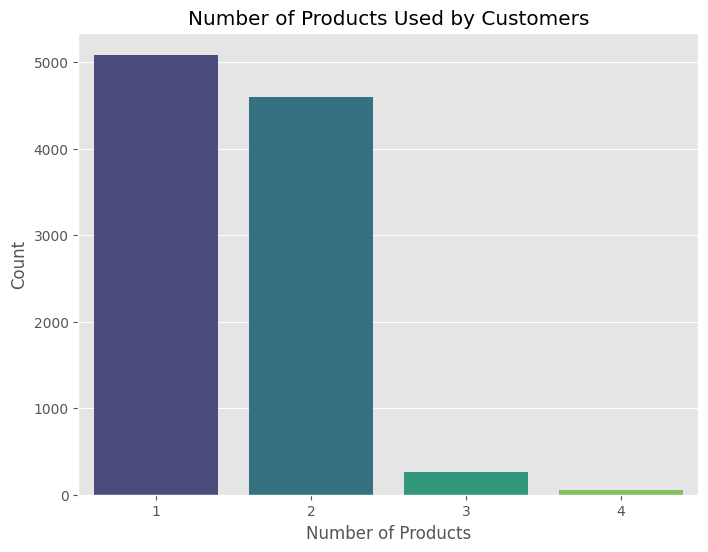

In [ ]:
products_count = (
    churn_modeling
    .NumOfProducts
    .value_counts()
)

plt.figure(figsize=(8, 6))
sns.barplot(x=products_count.index, y=products_count.values, palette='viridis')
plt.title('Number of Products Used by Customers')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

>- Most of products used by customer is 1st one and 2nd one.

#### **8.3.2 Analyze the usage patterns of different customer segments.**

In [ ]:
(
    churn_modeling
    .groupby(['Geography', 'Gender', 'IsActiveMember'])
    .NumOfProducts
    .value_counts()
    .reset_index()
)

,Geography,Gender,IsActiveMember,NumOfProducts,count
0,France,Female,0,1,548
1,France,Female,0,2,508
2,France,Female,0,3,36
3,France,Female,0,4,7
4,France,Female,1,1,568
5,France,Female,1,2,563
6,France,Female,1,3,19
7,France,Female,1,4,12
8,France,Male,0,1,705
9,France,Male,0,2,590


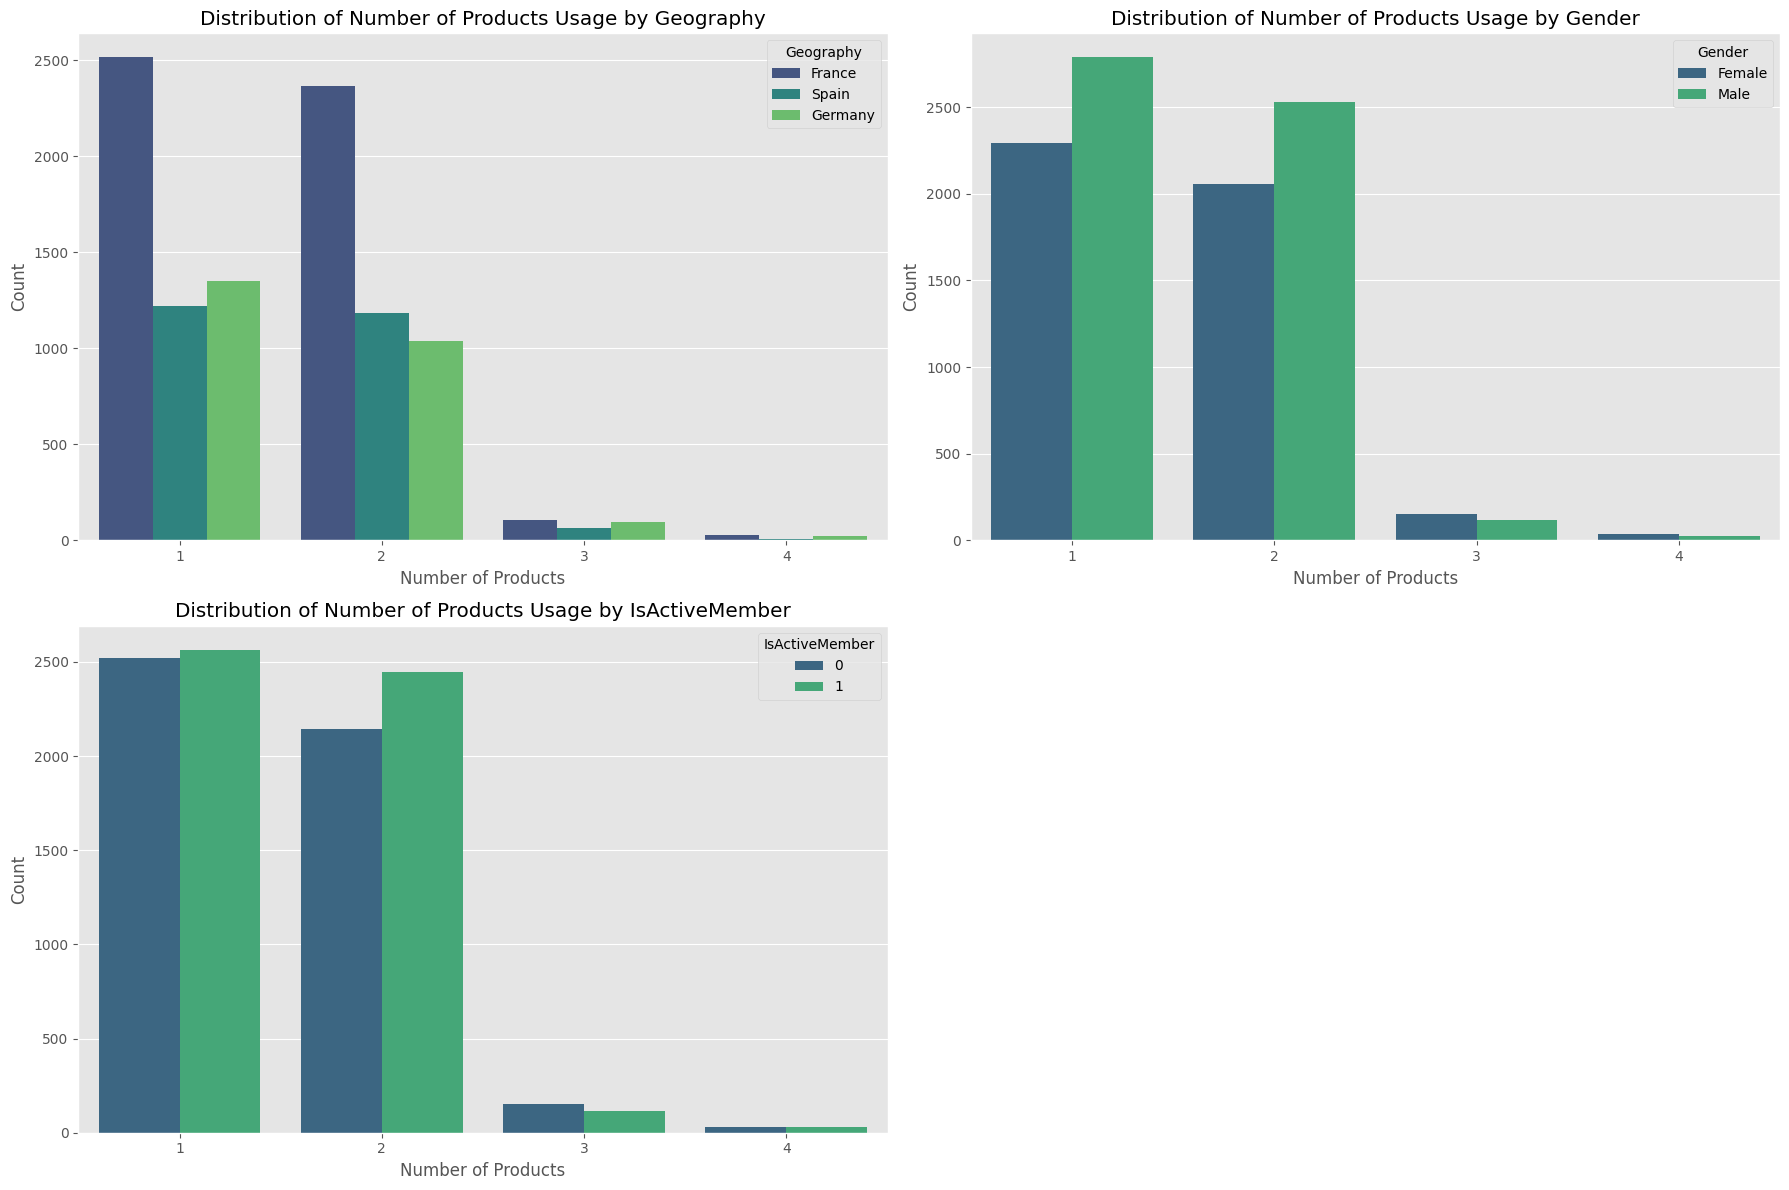

In [ ]:
segments = ['Geography', 'Gender', 'IsActiveMember']

plt.figure(figsize=(18, 12))
for i, segment in enumerate(segments,1):
  plt.subplot(2,2,i)
  sns.countplot(x='NumOfProducts', data=churn_modeling, hue=segment, palette='viridis')
  plt.title(f'Distribution of Number of Products Usage by {segment}')
  plt.xlabel('Number of Products')
  plt.ylabel('Count')
  plt.legend(title=segment)

plt.tight_layout()
plt.show()

### **Insights**

>- **Geography:**- As we know that 1st and 2nd products were used mots of the times.
>- 1st product is more used by France as compare to spain and germany and also 2nd one.
>- But germany used 1st product more as caompre to spain where as sapn used 2nd product most as campre to germany but ther is only 5-10% differnce between them.
>- 3rd and 4th product were not used most by each of region.

>- **Gender:**- Male used both 1st and 2nd both vproduct more as compare to female but 1st one is used most as coampre to 2nd one by male.
>- Same in case of female for 1st and 2nd. Also for 3rd and 4th product as of Geography.

>- **IsActiveMember:**- Those customers which are not active they use 1st ad 2nd product most and also same for active users.
>- Differnce is that not active users utilized 1st product abve 2500+ and 2600+ by active users.
>- For 2nd product not active users utilized above 2200+ and 2400+ by active users.
>- Same for 3rd and 4th product as of gender and geography


### **8.4 Financial Analysis**

#### **8.4.1 What is the average account balance of customers?**

In [ ]:
average_balance = (
    churn_modeling
    .Balance
    .mean()
)

print(f"Average Account Balance of Customers: ${average_balance:.2f}")

Average Account Balance of Customers: $76485.89


#### **8.4.2 Compare the financial characteristics of churned vs. non-churned customers.**

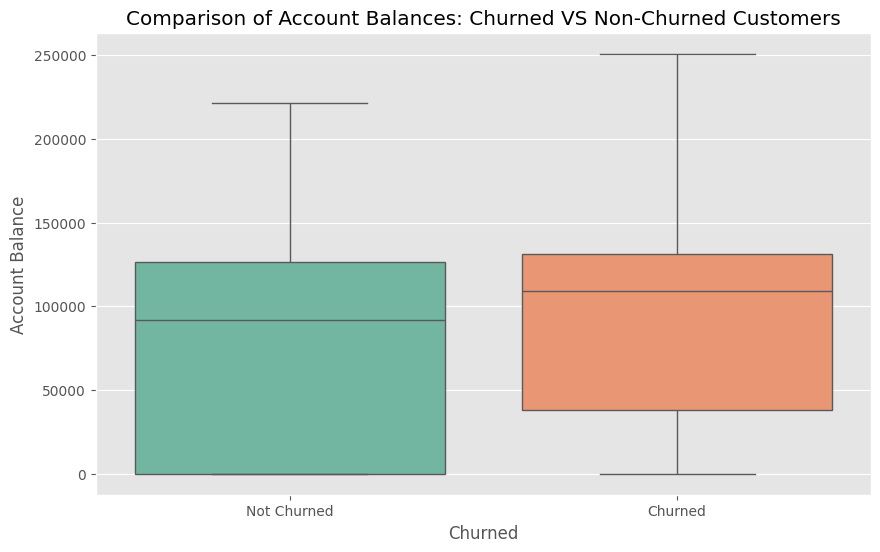

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churned', y='Balance', data=churn_modeling, palette='Set2')
plt.title('Comparison of Account Balances: Churned VS Non-Churned Customers')
plt.xlabel('Churned')
plt.ylabel('Account Balance')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

### **Insights**

>- **Not Churned Customers:** The majority of customers who did not churn have account balances concentrated between $85,000 and $150,000. Few outliers have higher balances up to $250,000.

> - **Churned Customers:** Customers who churned generally have account balances distributed similarly to non-churned customers but with slightly higher median balances (around $110,000 - $120,000). This suggests that account balance alone may not be a definitive indicator of churn risk.

### **Forecast**

>- **Segmentation by Balance ranges:** For customers with balances above ($150,000) focus on providing personalized services and investment ooprtunities.


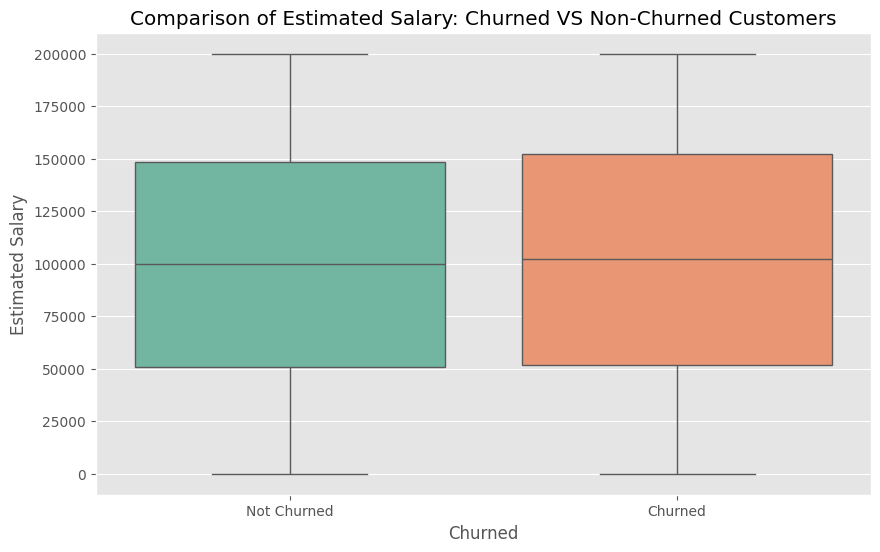

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churned', y='EstimatedSalary', data=churn_modeling, palette='Set2')
plt.title('Comparison of Estimated Salary: Churned VS Non-Churned Customers')
plt.xlabel('Churned')
plt.ylabel('Estimated Salary')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

### **Insights**

>- **Not Churned Customers:** Most customers who did not churn have estimated salaries concentrated between $ 50,000 and $150,000, with a median around $100,000.

>- **Churned Customers:** Customers who churned have estimated salaries distributed similarly to non-churned customers, but with slightly higher median and quartile values (approximately 1-3% higher), indicating a slight skew towards higher income levels among churned customers.

### **Forecast**

>- For higher income customers, emphasize wealth management services and investment opportunities. For moderate income customers, offer competitive banking products and financial planning advice.
